In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import neuralnet 

In [3]:
gps = synth_gen.GPsampler(gamma=10)
f = gps.get_func()

In [4]:
# f = lambda x: 2*np.tanh(x) + 2*np.sin(2*x) + x**3

In [17]:
target = 1 # By defaul X->Y
nb_samples = 300


Nx = {'name': 'normal', 'var': 10}
# Ny = {'name': 'normal', 'var': 10}#0.3}
Ny = {'name': 'normal', 'var': 1}

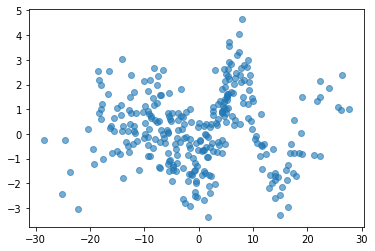

In [18]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y
plt.scatter(x, y, alpha=.6)

In [33]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y

from sklearn.metrics import r2_score

0.05542852863657621

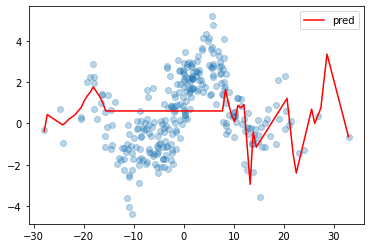

In [42]:
params = {'norm': False, 'learning_rate':2, 'epochs': 1000, 'H': 100}
net = neuralnet.Net(params)

net.train(x, y)

xs = np.linspace(min(x), max(x), 100)
ys = net.predict(xs)

plt.scatter(x, y, alpha=.3)
plt.plot(xs, ys, label='pred', c='r')
# plt.plot(xs, f(xs), label='true')
plt.legend()

r2_score(y, net.predict(x))

0.6021887906869114

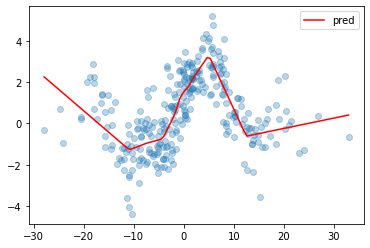

In [49]:
lr = [5, 0.01]
params = {'norm': False, 'learning_rate':lr, 'epochs': 1000, 'H': 100}
top_model = neuralnet.net_model_selection(x, y, params)

xs = np.linspace(min(x), max(x), 100)
ys = top_model.predict(xs)

plt.scatter(x, y, alpha=.3)
plt.plot(xs, ys, label='pred', c='r')
# plt.plot(xs, f(xs), label='true')
plt.legend()

r2_score(y, top_model.predict(x))

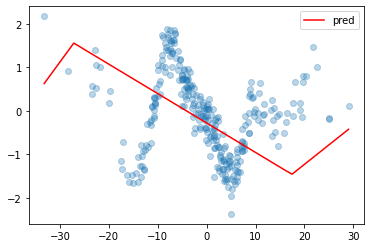

In [10]:
params = {'norm': True, 'learning_rate':.01, 'epochs': 1000, 'H': 100}
net = neuralnet.Net(params)

net.train(x, y)

xs = np.linspace(min(x), max(x), 1000)
ys = net.predict(xs)

plt.scatter(x, y, alpha=.3)
plt.plot(xs, ys, label='pred', c='r')
# plt.plot(xs, f(xs), label='true')
plt.legend()

In [11]:
r2_score(y, net.predict(x))

0.855422171349296

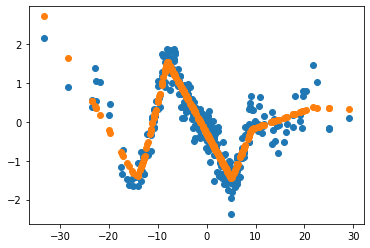

In [12]:
plt.scatter(x, y)
plt.scatter(x, net.predict(x))